#Start

In [1]:
#importations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as sm

In [2]:
#read file
data = pd.read_csv('ABNB.csv')

#Exploratory Data Analysis

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       454 non-null    object 
 1   Open       454 non-null    float64
 2   High       454 non-null    float64
 3   Low        454 non-null    float64
 4   Close      454 non-null    float64
 5   Adj Close  454 non-null    float64
 6   Volume     454 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 25.0+ KB


In [5]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,454.000000,454.000000,454.000000,454.000000,454.000000,4.540000e+02
mean,152.735925,156.465595,148.969855,152.729185,152.729185,6.690328e+06
std,28.340932,29.107813,27.490223,28.226659,28.226659,4.417387e+06
min,88.879997,91.459999,86.709999,89.080002,89.080002,1.995400e+06
25%,136.821507,139.842495,132.920002,135.955002,135.955002,4.114375e+06
50%,154.932495,159.099998,151.230004,155.654999,155.654999,5.450000e+06
75%,172.556507,175.974998,168.595005,171.744996,171.744996,7.631375e+06
max,216.240005,219.940002,209.089996,216.839996,216.839996,3.975500e+07


## Open vs Close

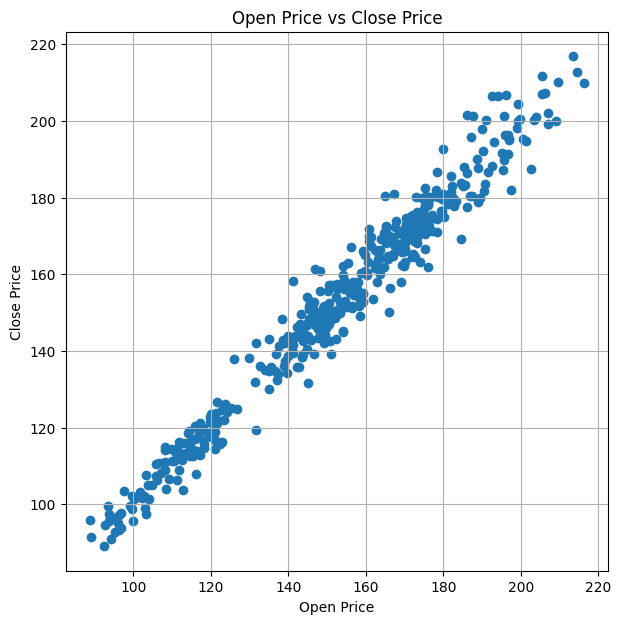

In [7]:
plt.figure(figsize=(7,7),dpi=100)
plt.scatter(data["Open"],data["Close"],marker='o')
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.grid()
plt.title("Open Price vs Close Price")
plt.show()

#Time Series Conversion

In [8]:
data["DATE"] = pd.DataFrame(data["Date"])

In [9]:
data.set_index("DATE",inplace=True)

In [10]:
data.drop("Date",inplace=True,axis=1)

In [11]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
DATE,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


In [12]:
#taking only one feature Closing Price moving ahead
new_data = data.drop(['Open','High','Low','Adj Close','Volume'],axis=1)

In [13]:
new_data

,Close
DATE,
2020-12-11,139.250000
2020-12-14,130.000000
2020-12-15,124.800003
2020-12-16,137.990005
2020-12-17,147.050003
...,...
2022-09-26,103.230003
2022-09-27,106.370003
2022-09-28,110.690002


In [14]:
new_data = new_data[0:int(len(new_data)*0.7)]

Text(0.5, 1.0, 'Analysis of Time Series Data')

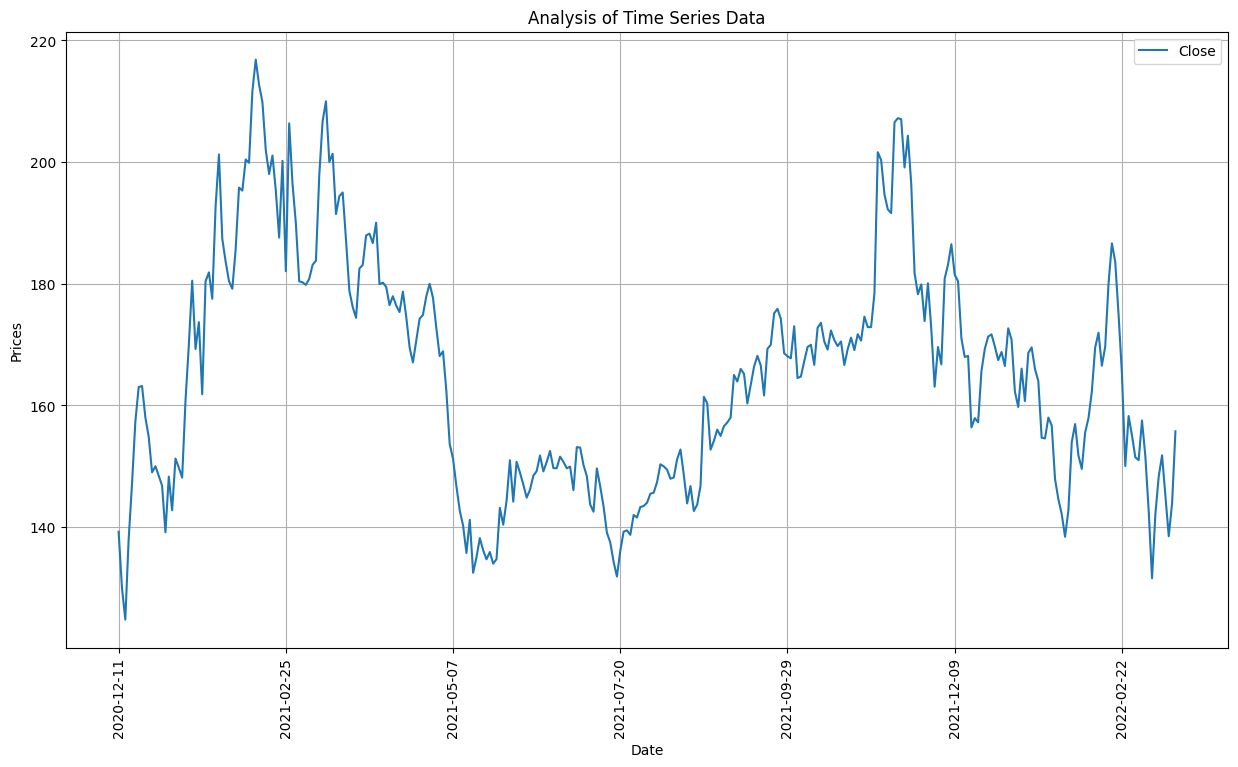

In [15]:
new_data.plot(figsize=(15,8))
plt.xlabel("Date")
plt.ylabel("Prices")
plt.xticks(rotation='vertical')
plt.grid()
plt.title("Analysis of Time Series Data")

### Initial Analysis tells that Data has a downwards `trend` and some `seasonality` as well, also the `level` changes with time.

#Decompositon

<Figure size 640x480 with 0 Axes>

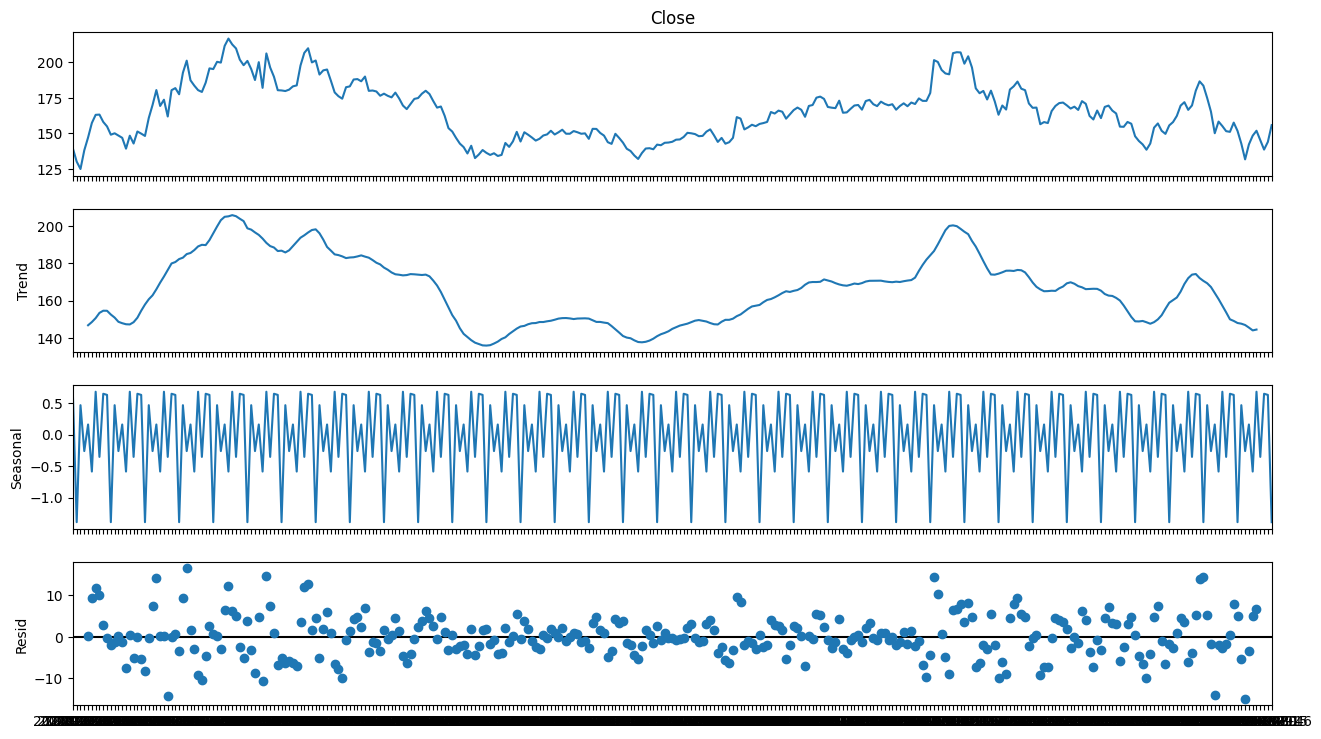

In [16]:
decom = seasonal_decompose(new_data['Close'],period=9)
fig = plt.figure(dpi=100)
fig = decom.plot()
fig.set_size_inches(15,8)

#Train-Test Split

In [17]:
train = new_data[0:int(len(new_data)*0.7)]
test = new_data[int(len(new_data)*0.7):]

In [18]:
train

,Close
DATE,
2020-12-11,139.250000
2020-12-14,130.000000
2020-12-15,124.800003
2020-12-16,137.990005
2020-12-17,147.050003
...,...
2021-10-21,170.500000
2021-10-22,166.639999
2021-10-25,169.240005


In [19]:
test

,Close
DATE,
2021-10-28,171.699997
2021-10-29,170.660004
2021-11-01,174.600006
2021-11-02,172.869995
2021-11-03,172.869995
...,...
2022-03-10,151.800003
2022-03-11,145.139999
2022-03-14,138.500000


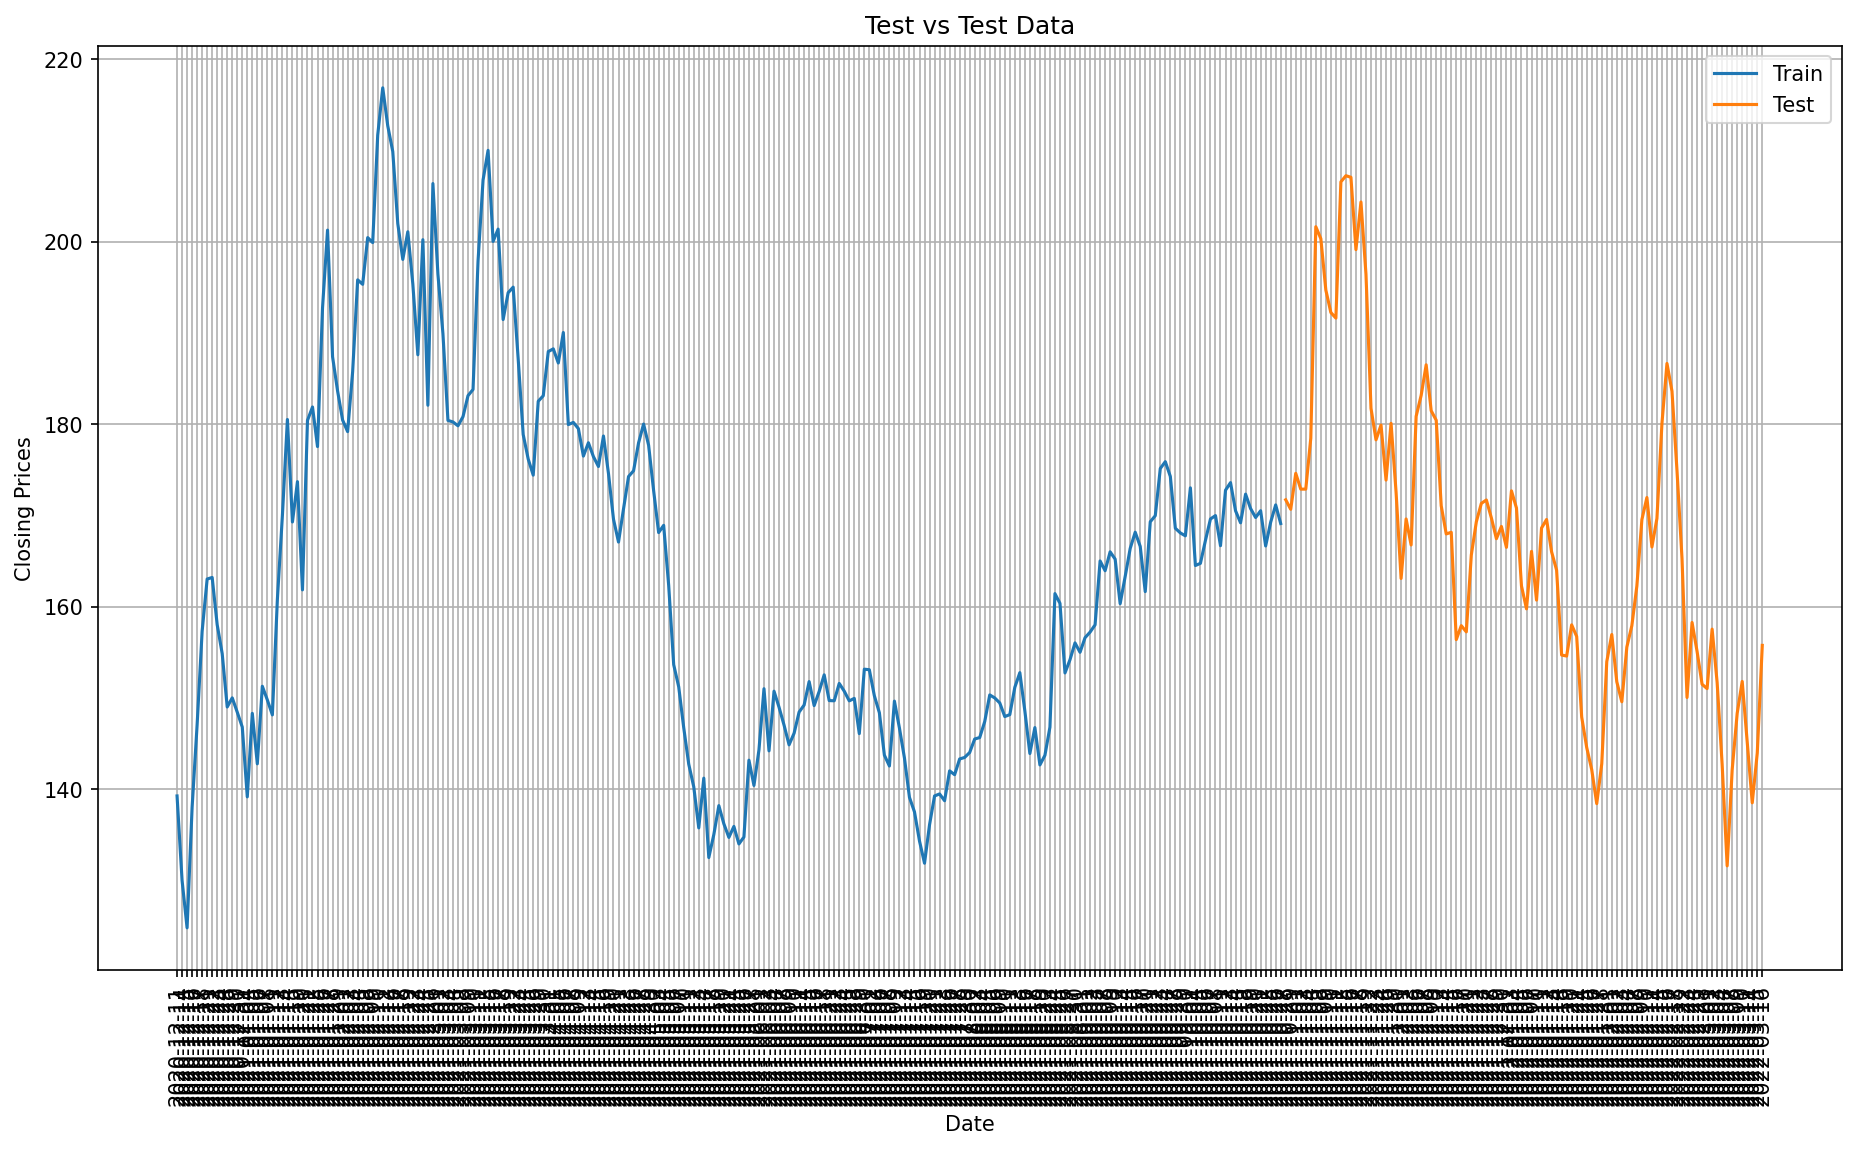

In [20]:
plt.figure(figsize=(15,8),dpi=150)
plt.plot(train)
plt.plot(test)
plt.xlabel("Date")
plt.ylabel("Closing Prices")
plt.xticks(rotation='vertical')
plt.grid()
plt.legend(["Train","Test"])
plt.title("Test vs Test Data")
plt.show()

#Using Exponential Smoothing with Custom Parameters

In [21]:
Exp = ExponentialSmoothing(train['Close'],seasonal_periods=9,trend='additive')
model = Exp.fit(smoothing_level=0.9,smoothing_trend=0.4,smoothing_seasonal=0.9)
pred_value = model.forecast(len(test['Close']))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


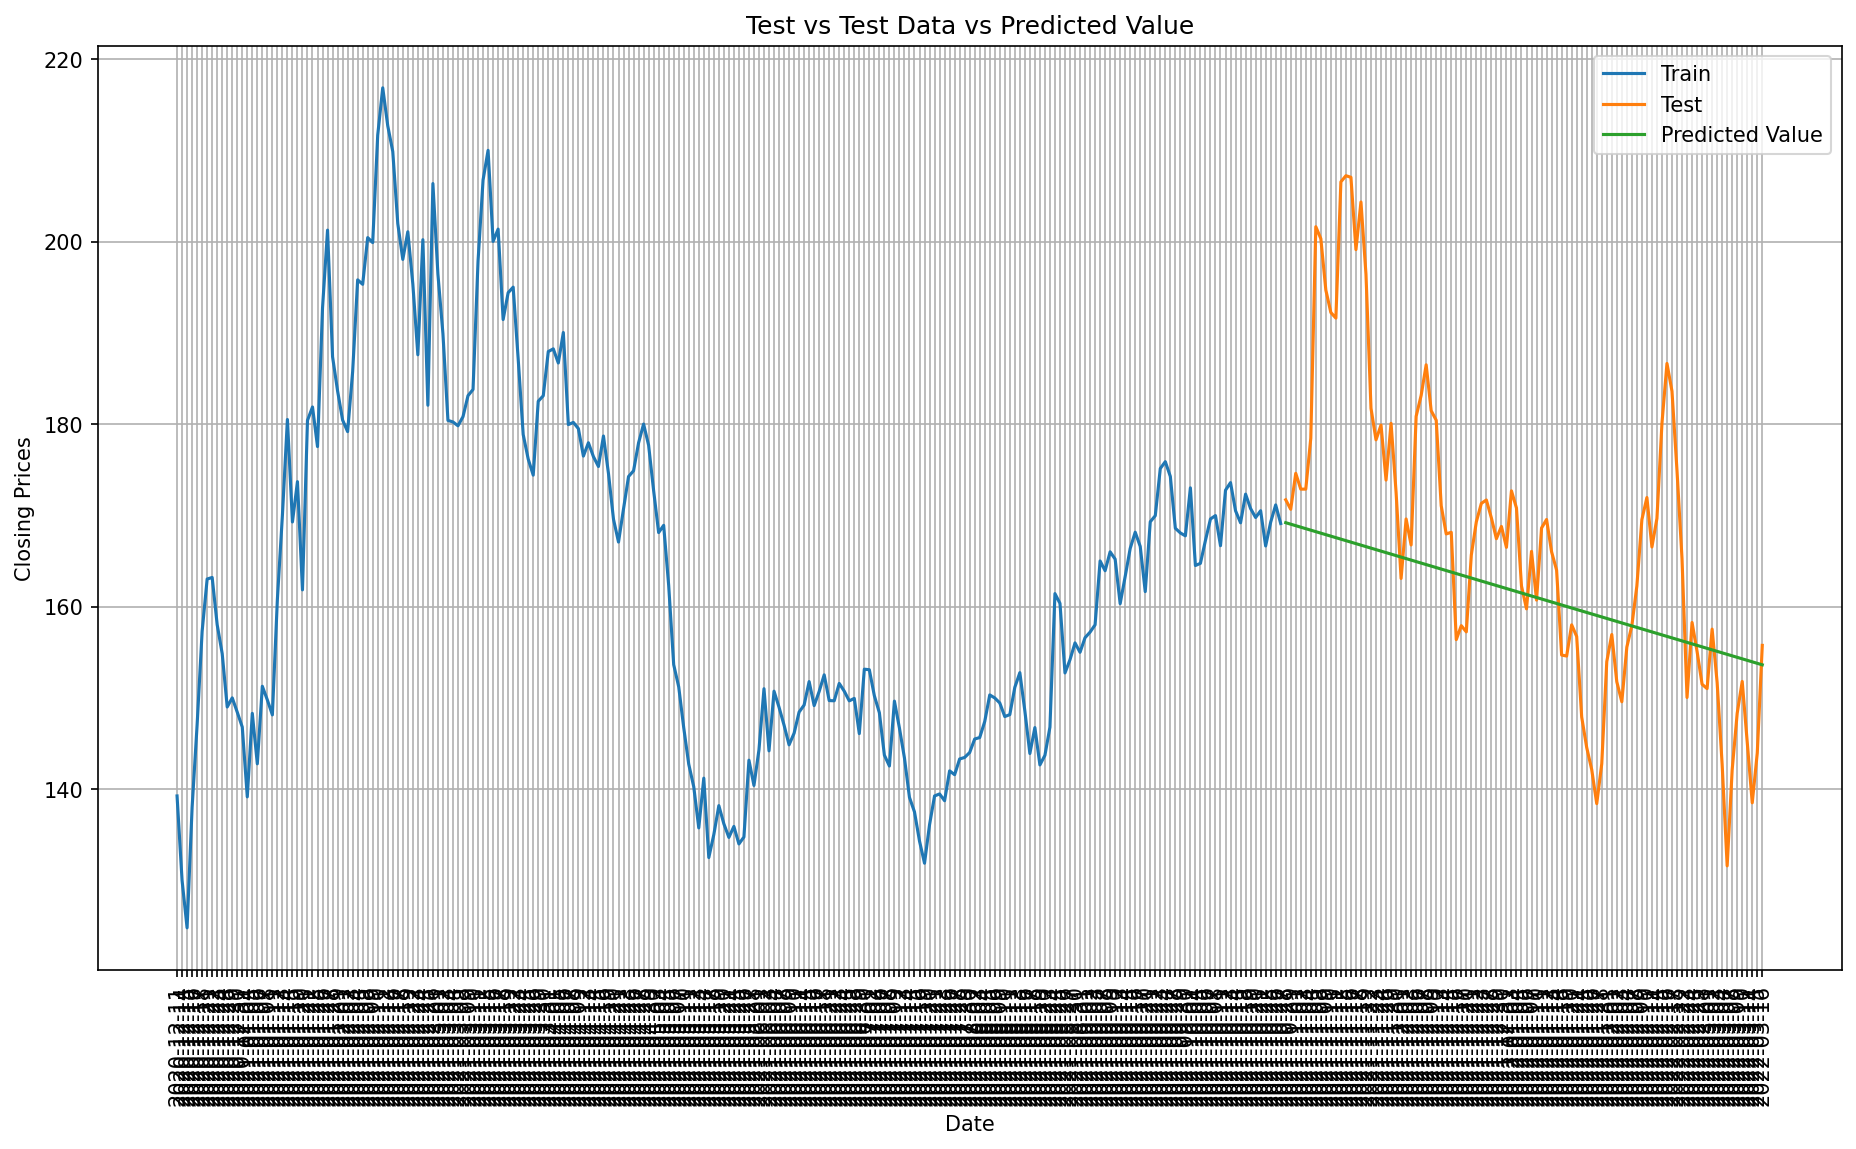

In [22]:
plt.figure(figsize=(15,8),dpi=150)
plt.plot(train)
plt.plot(test)
plt.plot(pred_value)
plt.xlabel("Date")
plt.ylabel("Closing Prices")
plt.xticks(rotation='vertical')
plt.grid()
plt.legend(["Train","Test","Predicted Value"])
plt.title("Test vs Test Data vs Predicted Value")
plt.show()

#Model Performance

In [23]:
rmse=np.sqrt(mean_squared_error(test['Close'],pred_value))
print("Root Mean Squared Error:",rmse)

mape = mean_absolute_percentage_error(test['Close'],pred_value)
print("Mean Absolute Percentage Error:", mape)

Root Mean Squared Error: 15.123846382007885
Mean Absolute Percentage Error: 0.06515249827308862


#Seasonal ARIMA Model

## Dickey Fuller Test to check for Stationarity

In [24]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(new_data, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.929390
p-value                          0.042036
#Lags Used                       0.000000
Number of Observations Used    316.000000
Critical Value (1%)             -3.451215
Critical Value (5%)             -2.870730
Critical Value (10%)            -2.571666
dtype: float64


P Value must be greater than 0.05 for stationarity, here we can see the value is 0.042 hence its stationary

In [25]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 2020-12-11 to 2022-03-16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   317 non-null    float64
dtypes: float64(1)
memory usage: 5.0+ KB


## First Order Diff for Detrending and Seasonal Diff for removing Seasonality

In [26]:
#taking first order diff
new_data = new_data.diff()
new_data.dropna(inplace=True)

In [27]:
#taking seasonal diff
new_data = new_data - new_data.shift(12)

In [28]:
new_data

,Close
DATE,
2020-12-14,NaN
2020-12-15,NaN
2020-12-16,NaN
2020-12-17,NaN
2020-12-18,NaN
...,...
2022-03-10,13.149994
2022-03-11,8.540008
2022-03-14,-14.860001


In [29]:
#new_data = new_data.diff()
new_data.dropna(inplace=True)

In [30]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(new_data, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -8.874184e+00
p-value                        1.372109e-14
#Lags Used                     1.200000e+01
Number of Observations Used    2.910000e+02
Critical Value (1%)           -3.453023e+00
Critical Value (5%)           -2.871524e+00
Critical Value (10%)          -2.572090e+00
dtype: float64


## Getting optimal P,D,Q values using PACF and ACF plots

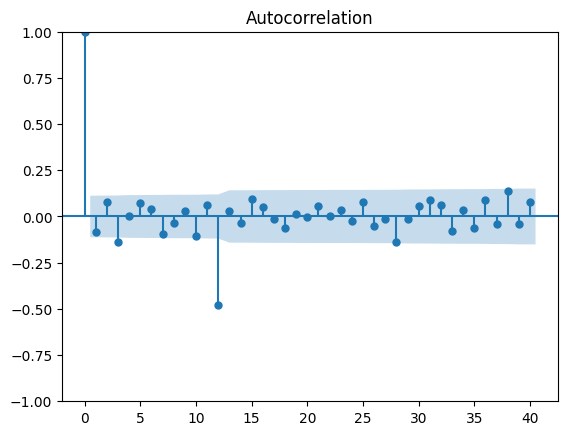

In [32]:
fig = sm.graphics.plot_acf(new_data, lags=40)

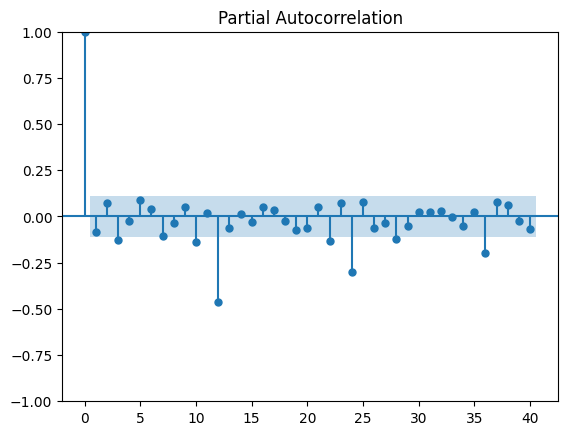

In [33]:
fig = sm.graphics.plot_pacf(new_data, lags=40)

## Model Building and Param Tuning

In [ ]:
#1,2,0,9
mod = sm.statespace.SARIMAX(new_data['Close'], trend='n', order=(1,2,1), seasonal_order=(10,2,26,9))
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
predicted_val = results.predict(start = 221, dynamic= True)

In [ ]:
plt.figure(figsize=(15,8),dpi=150)
plt.plot(train)
plt.plot(test)
plt.plot(predicted_val)
plt.xlabel("Date")
plt.ylabel("Closing Prices")
plt.xticks(rotation='vertical')
plt.grid()
plt.legend(["Train","Test","Predicted Value"])
plt.title("Test vs Test Data vs Predicted Value")
plt.show()